<a href="https://colab.research.google.com/github/Mardugo/ClaseMachineLearning/blob/main/Codigo/ANN_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=8,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=4) #set for same data points for each run
print(coef)
# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))
# Scale target y (salary) to range 2000000..15000000 
y = np.interp(y, (y.min(), y.max()), (2000000, 15000000))
print(x.shape)
print(y.shape)
print(x.min(), x.max())
print(y.min(), y.max())

"""
#Otros datos a hacer regresión
n_samples = 1000
rng = np.random.RandomState(0)
#x = rng.randn(n_samples, 1)
x = ((rng.rand(n_samples,1)-0.5)*3)
noise = rng.normal(loc=0.0, scale=0.3, size=n_samples)
y = (1.5 * x[:, 0] + 3*np.sin(2 * np.pi * x[:, 0]) - noise)
"""


67.18524705164678
(500, 1)
(500,)
0.0 20.0
2000000.0 15000000.0


'\n#Otros datos a hacer regresión\nn_samples = 1000\nrng = np.random.RandomState(0)\n#x = rng.randn(n_samples, 1)\nx = ((rng.rand(n_samples,1)-0.5)*3)\nnoise = rng.normal(loc=0.0, scale=0.3, size=n_samples)\ny = (1.5 * x[:, 0] + 3*np.sin(2 * np.pi * x[:, 0]) - noise)\n'

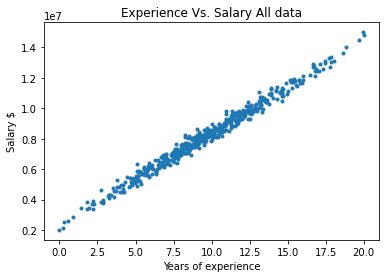

(500, 1)
(500,)


In [23]:
plt.figure()
plt.plot(x,y,'.')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary All data')
plt.show()
print(x.shape)
print(y.shape)

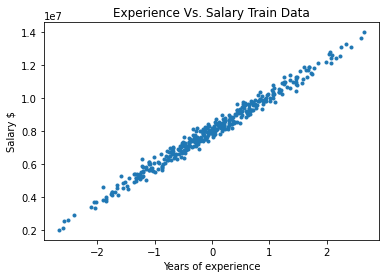

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)
scaler = StandardScaler()#StandardScaler, MinMaxScaler
scaler.fit(x_train)
x_train =scaler.transform(x_train)
x_test  = scaler.transform(x_test)

plt.figure()
plt.plot(x_train,y_train,'.',label='train data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary Train Data')
plt.show()

In [44]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(5,2),alpha=0.0001,activation="relu",random_state=1,learning_rate='adaptive',learning_rate_init=1, max_iter=600,solver="adam",verbose=True)
#regr = MLPRegressor(random_state=1, max_iter=500)

print(regr.fit(x_train, y_train))


Iteration 1, loss = 34692425684830.05859375
Iteration 2, loss = 34691986495481.75000000
Iteration 3, loss = 34690368508564.73046875
Iteration 4, loss = 34686449897575.35937500
Iteration 5, loss = 34678899733764.68750000
Iteration 6, loss = 34666106731433.76171875
Iteration 7, loss = 34645705984629.26562500
Iteration 8, loss = 34615458689673.89843750
Iteration 9, loss = 34572504339135.55078125
Iteration 10, loss = 34513120125453.56640625
Iteration 11, loss = 34434779079184.89453125
Iteration 12, loss = 34332420232628.39453125
Iteration 13, loss = 34201970463956.66015625
Iteration 14, loss = 34037493683606.00390625
Iteration 15, loss = 33833565206404.11718750
Iteration 16, loss = 33585279929012.59765625
Iteration 17, loss = 33286828278378.07031250
Iteration 18, loss = 32932339888644.59765625
Iteration 19, loss = 32513548925731.03906250
Iteration 20, loss = 32023954182615.16796875
Iteration 21, loss = 31461735900284.45312500
Iteration 22, loss = 30813720606503.72265625
Iteration 23, loss 

In [45]:
#TAREA:
# investigar que es el R^2, como se analizan los resultados!!
# Disminuir el numero de datos con los que entrenan y ver que pasa!!! Concluir
print("R^2 entrenamiento",regr.score(X_train,y_train))
print("R^2 validacion",regr.score(X_test, y_test))

R^2 entrenamiento 0.9834772455132172
R^2 validacion 0.9870673685143987


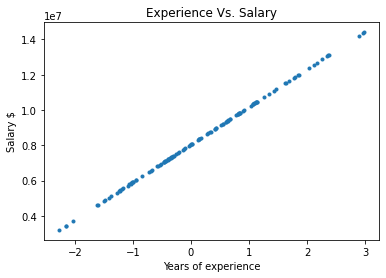

In [46]:
y_test_pred=regr.predict(X_test)
plt.figure()
plt.plot(X_test,y_test_pred,'.',label='Complete data')
plt.xlabel('Years of experience')
plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')
plt.show()

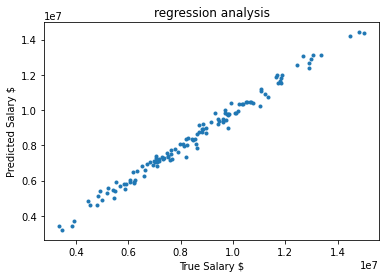

In [43]:
y_test_pred=regr.predict(x_test)
plt.figure()
plt.plot(y_test,y_test_pred,'.')
plt.xlabel('True Salary $')
plt.ylabel('Predicted Salary $')
plt.title('regression analysis')
plt.show()